In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import optimize
from scipy.stats import poisson
import math

In [54]:
#data = np.zeros(shape=num_ev, dtype=[('timeStamp','f4')
data = pd.read_excel('/Users/user/Desktop/Bells_data_test.xlsx', dtype={'Name': str, 'Value': float})

In [55]:
data

,a_pc_0,b_pc_0,nc_pc_0_1,nc_pc_0_2,nc_pc_0_3,a_pc_45,b_pc_45,nc_pc_45_1,nc_pc_45_2,nc_pc_45_3
0,0,0,1.9041,1.6957,1.6873,45,0,1.1696,1.1436,1.1823
1,0,10,1.6709,NaN,NaN,45,10,1.5181,1.4899,1.4951
2,0,20,1.5015,NaN,NaN,45,20,1.6194,1.6321,1.6187
3,0,30,1.2353,NaN,NaN,45,30,1.7549,1.7266,1.7649
4,0,40,0.9736,NaN,NaN,45,40,1.7856,1.7911,1.7772
5,0,50,0.7097,NaN,NaN,45,50,1.7226,1.7262,1.7136
6,0,60,0.4744,NaN,NaN,45,60,1.5388,1.5633,1.6009
7,0,70,0.3267,NaN,NaN,45,70,1.3017,1.3045,1.3441
8,0,80,0.2408,NaN,NaN,45,80,1.0615,1.0743,1.0588
9,0,90,0.2461,0.2219,0.2213,45,90,0.8218,0.7787,0.7777


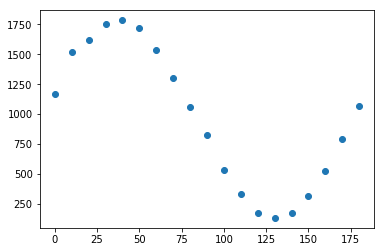

In [213]:
beta = data['b_pc_45']
alpha = data['a_pc_45']
Nc = data['nc_pc_45_1']*1000

plt.scatter(beta, Nc)

In [258]:
C_test = 
def N_constance(a, alpha, beta, theta, phim):
    a*((np.sin(alpha)**2)(np.sin(x)**2)(np.cos(theta)**2) + (np.cos(alpha)**2)(np.cos(x)**2)(np.sin(theta)**2) + 0.25(np.sin(2*alpha)*np.sin(2*x)*np.sin(2*theta)*np.cos(phim))) + C
    #return a * np.sin(b*x + d) + c

SyntaxError: invalid syntax (<ipython-input-258-75f25b806e91>, line 1)

In [369]:
def N_global(x, A, alpha, theta, phim, C):
    alpha = np.radians(alpha)
    x = np.radians(x)
    theta = np.radians(theta)
    phim = np.radians(phim)

    return A * ( (np.sin(alpha)**2)*(np.sin(x)**2)*(np.sin(theta)**2) + (np.cos(alpha)**2)*(np.cos(x)**2)*(np.sin(theta)**2)) + 0.25*(np.sin(2*alpha)*np.sin(2*x)*np.sin(2*theta)*np.cos(phim)) + C



In [370]:
params, params_covariance = optimize.curve_fit(N_global, beta, Nc, p0=[100, 45, 45, 0.4, 100])
print(params)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.

In [ ]:
#plt.figure(figsize=(6, 4))
plt.scatter(beta, Nc, label='Data')
plt.plot(beta, N_global(beta, params[0], params[1], params[2], params[3], params[4]),
         label='Fitted function')
plt.legend(loc='best')
#plt.ylim(900, 1000)

plt.show()

In [275]:
def test_func(x, a, alpha, theta, phim):
    a*((math.sin(alpha)**2)*(math.sin(x)**2)*(math.cos(theta)**2) + (math.cos(alpha)**2)*(math.cos(x)**2)*(math.sin(theta)**2) + 0.25*(math.sin(2*alpha)*math.sin(2*x)*math.sin(2*theta)*math.cos(phim))) + C
    #return a * np.sin(b*x + d) + c
#p0=[2000, 45, 45]
#params, params_covariance = optimize.curve_fit(test_func, beta, Nc, p0=[2000, 10, 1, 5])
params, params_covariance = optimize.curve_fit(N_global, beta, Nc, p0=[2000, 45, 45, 0.1, 500])
print(params)

NameError: global name 'cos' is not defined

In [251]:
#lam = float(18.3165/18)
#error = scipy.stats.poisson(lam, size=len(beta))
xerr = beta #is this true?
yerr = np.zeros(len(Nc))
for i in range(len(Nc)):
    yerr[i] = np.sqrt(Nc[i])
    


In [252]:
yerr

array([34.1994152 , 38.96280277, 40.24176934, 41.89152659, 42.25636047,
       41.50421665, 39.22754135, 36.07907981, 32.58066912, 28.66705426,
       23.1322286 , 18.20988742, 13.20605922, 11.37980668, 12.94604187,
       17.66352173, 22.82323378, 28.05352028, 32.62514368])

In [253]:
def red_chisq(o, c, var, n, m):
    v = n - m
    chi = 0
    for i in range(0,18):
        chi = chi + ( (o[i] - c[i])**2) / (var[i]**2)
        #print(o[i]-c[i])
        print((o[i]-c[i])**2/var[i]**2)
    return chi / v

red_chisq(Nc, test_func(beta, params[0], params[1], params[2], params[3]), yerr, 19, 3)

1.1275088602405794
2.7363032424390927
0.41197513719164097
0.008981046559548159
0.008748862836780648
0.07849638707402766
0.1680236339038011
0.6650236377846781
0.012514323962593067
1.4572393375944863
0.0723233859683387
0.4360959034159818
0.4323057732655306
0.22733384342032026
1.0051941639229693
0.02608113782658526
0.004764126911391202
0.06519439480896508


0.5590066999454569

In [255]:
params

array([824.94137366,  10.01921231, 959.8586184 ,   2.83871238])

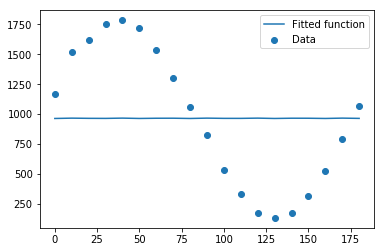

In [280]:
#plt.figure(figsize=(6, 4))
plt.scatter(beta, Nc, label='Data')
plt.plot(beta, N_global(beta, params[0], params[1], params[2], params[3], params[4]),
         label='Fitted function')
plt.legend(loc='best')

plt.show()

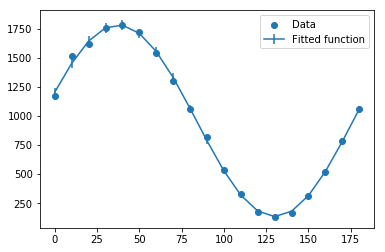

In [219]:
#plt.figure(figsize=(6, 4))
plt.scatter(beta, Nc, label='Data')
plt.errorbar(beta, test_func(beta, params[0], params[1], params[2], params[3]), yerr=yerr,
         label='Fitted function')
plt.legend(loc='best')

plt.show()

In [220]:
params_covariance

array([[ 6.97475937e+01, -3.25306179e-04, -1.92249590e+00,
         3.18873166e-02],
       [-3.25306179e-04,  2.88575768e-08,  1.42249513e-04,
        -2.76080552e-06],
       [-1.92249590e+00,  1.42249513e-04,  3.30374627e+01,
        -1.18028075e-02],
       [ 3.18873166e-02, -2.76080552e-06, -1.18028075e-02,
         3.57093110e-04]])